# Ringkasan Berita


Ringkasan berita digunakan untuk mempermudah ketika ingin mengetahui isi berita secara jelas dan ringkas


## Proses Pembersihan Teks


### Import Library


In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string

import pickle as pkl

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity 

### Load Data


In [25]:
data = pd.read_csv('../antaranews.csv')
data.head()

,title,content,image,url,category,source
0,Gus Ipul tanggalkan jabatan Wali Kota Pasuruan,"\n""Per hari ini juga saya mundur sebagai Wali ...",https://img.antaranews.com/cache/1200x800/2024...,https://www.antaranews.com/berita/4324327/gus-...,Politik,antaranews
1,Presiden Jokowi lantik Aida Suwandi jadi Anggo...,"\n""Demi Allah saya bersumpah bahwa saya tidak ...",https://img.antaranews.com/cache/1200x800/2024...,https://www.antaranews.com/berita/4324243/pres...,Politik,antaranews
2,Presiden Jokowi lantik Eddy Hartono jadi Kepal...,"\n""Demi Allah saya bersumpah bahwa saya akan s...",https://img.antaranews.com/cache/1200x800/2024...,https://www.antaranews.com/berita/4324219/pres...,Politik,antaranews
3,Wakil KSAD tetapkan 500 warga sipil sebagai ko...,"\n“Dengan mengucap Bismillahirrahmanirrahim, p...",https://img.antaranews.com/cache/1200x800/2024...,https://www.antaranews.com/berita/4324191/waki...,Politik,antaranews
4,"Relawan Prabowo-Gibran: Gerakan ""tusuk 3 paslo...",\nJakarta (ANTARA) - Koordinator Nasional Prab...,https://img.antaranews.com/cache/1200x800/2024...,https://www.antaranews.com/berita/4324179/rela...,Politik,antaranews


### Preprocessing Text


In [26]:
def clean_text(text):
	# make text lowercase
	text = text.lower() 

	# remove line breaks
	text = re.sub(r'\n', ' ', text)

	# remove puctuation
	translator = str.maketrans('', '', string.punctuation)
	text = text.translate(translator)

		# remove numbers
	text = re.sub(r'\d+', '', text)

	# remove extra spaces 
	text = re.sub(r'\s+', ' ', text)

	# remove non-ascii characters
	text = re.sub(r'[^\x00-\x7F]+', ' ', text)

	return text

def clean_stopword(tokens):
	listStopword =  set(stopwords.words('indonesian'))
	filtered_words = [word for word in tokens if word.lower() not in listStopword]
	return filtered_words

In [27]:
def preprocess_text(content):
	result = {}
	for i, text in enumerate(tqdm(content)):
		cleaned_text = clean_text(text)
		tokens = word_tokenize(cleaned_text)
		cleaned_stopword = clean_stopword(tokens)
		result[i] = ' '.join(cleaned_stopword)
	return result


prep_result = preprocess_text(data['content'])

100%|██████████| 142/142 [00:00<00:00, 433.70it/s]


In [28]:
print(prep_result)

{0: 'mundur wali kota pasuruan otomatis itujakarta menteri sosial dilantik saifullah yusuf gus ipul menanggalkan jabatannya wali kota pasuruan bersamaan pelantikannya anggota kabinet mundur wali kota pasuruan otomatis gus ipul dilantik mensos istana negara jakarta rabu berkoordinasi menteri koordinator bidang pembangunan manusia kebudayaan muhadjir effendy pelaksana tugas mensos mengikuti proses serah terima jabatan terkait penunjukkannya mensos gus ipul menilai kepercayaan presiden membantu presiden sisa pemerintahan transisi pemerintahan berkaitan tugastugas menteri sosial presiden joko widodo jokowi melantik saifullah yusuf menteri sosial mensos definitif menggantikan tri rismaharini maju kontestasi pilkada pelantikan saifullah yusuf digelar istana negara jakarta wib sesuai surat keputusan presiden nomor b pengangkatan menteri sosial kabinet indonesia maju allah bersumpah setia uud negara ri menjalankan peraturan perundangundangan seluruslurusnya dharma bakti bangsa negara gus ipul 

### Memisahkan Berita


In [29]:
kalimat_preprocessing = nltk.sent_tokenize(prep_result[4])
kalimat = nltk.sent_tokenize(data['content'][4])

## TF-IDF


$$W_{d,t} = tf_{t,d} \cdot idf_{t,d}$$


Keterangan:

$W_{d,t}$ = Nilai _Term Frequency_ untuk _term_ (t) dalam dokumen (d).<br>
$tf_{t,d}$ = Frekuensi kemunculan _term_ (t) dalam dokumen (d).<br>
$idf_{t,d}$ = Inverse Document Frequency Nilai kebalikan frekuensi dokumen _term_ (t) dalam dokumen (d).


$$tf= \frac{tf}{max(tf)}$$


Keterangan:

$tf$ = banyaknya kata yang dicari dalam dokumen<br>
$max⁡(tf)$ = jumlah kemunculan term terbanyak pada dokumen yang sama


$$idf_{t}= \frac{D}{max(df_{t})}$$


Keterangan:

$D$ = total dokumen<br>
$df(t)$ = jumlah dokumen yang mengandung _term_ (t)


### TF-IDF tanpa Preprocessing


In [30]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(kalimat)

terms = tfidf_vectorizer.get_feature_names_out()
tfidf = pd.DataFrame(data=tfidf.toarray(), columns=terms)

tfidf

,2024,agar,ahmad,ajakan,ajang,akan,aksi,aktif,anggaran,angka,...,tiga,tingkatkan,tusuk,ulang,untuk,usung,wardana,warga,yakni,yang
0,0.144387,0.000000,0.000000,0.190325,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.163453,0.000000,0.190325,0.000000,0.098450,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.223325,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.115520,0.000000,0.000000,0.000000,0.000000,0.338845
3,0.170309,0.000000,0.000000,0.000000,0.000000,0.192797,0.00000,0.000000,0.000000,0.000000,...,0.192797,0.000000,0.000000,0.000000,0.000000,0.000000,0.224493,0.000000,0.224493,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.139874,0.000000,...,0.000000,0.139874,0.000000,0.139874,0.217059,0.139874,0.000000,0.120125,0.000000,0.106113
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.33077,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.271155,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.250240,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.150723,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.198991,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.135682,0.000000,0.000000,0.225267,0.000000,0.000000
9,0.000000,0.157976,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.157976


### TF-IDF menggunakan Preprocessing


In [31]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_preprocessing = tfidf_vectorizer.fit_transform(kalimat_preprocessing)

pkl.dump(tfidf_preprocessing, open('tfidf_preprocessing.pkl', 'wb'))
pkl.dump(tfidf_vectorizer, open('tfidf_vectorizer.pkl', 'wb'))

terms = tfidf_vectorizer.get_feature_names_out()

tfidf_preprocessing = pd.DataFrame(data=tfidf_preprocessing.toarray(), columns=terms)

tfidf_preprocessing

,ahmad,ajakan,ajang,aksi,aktif,anggaran,angka,anthony,anungrano,baca,...,surat,tata,team,terkait,tingkatkan,tusuk,ulang,usung,wardana,warga
0,0.054965,0.054965,0.054965,0.054965,0.054965,0.054965,0.054965,0.21986,0.054965,0.164895,...,0.10993,0.054965,0.054965,0.054965,0.054965,0.054965,0.054965,0.054965,0.054965,0.10993


## Cosine Similarity


$$simmilarity(A, B) = \frac{A \cdot B}{|A||B|}$$


Keterangan:

$A.B$ = Vector dot product dari A dan B dihitung dengan $\sum_{i=1}^n x_{k}y_{k}$

$|A|$ = Panjang vektor A dihitung dengan $\sum_{i=1}^n x_{k}^2$ = $\sqrt{\mathrm{a}_{1}^{2} + \mathrm{a}_{2}^{2} + \mathrm{a}_{3}^{2}} +...+ \mathrm{n}_{n}^{2}$

$|B|$ = Panjang vektor A dihitung dengan $\sum_{i=1}^n y_{k}^2$ = $\sqrt{\mathrm{b}_{1}^{2} + \mathrm{b}_{2}^{2} + \mathrm{b}_{3}^{2}} + ...+ \mathrm{n}_{n}^{2}$


### Cossim tanpa Preprocessing


In [32]:
cossim = cosine_similarity(tfidf, tfidf)

similarity_matrix = pd.DataFrame(cossim, 
								 index=range(len(kalimat)), 
								 columns=range(len(kalimat)))

similarity_matrix

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.109742,0.109487,0.207505,0.045790,0.000000,0.072455,0.078672,0.036005,0.063599,0.094839,0.164321
1,0.109742,1.000000,0.229982,0.000000,0.141612,0.137607,0.128938,0.217771,0.000000,0.000000,0.068511,0.000000
2,0.109487,0.229982,1.000000,0.034618,0.137960,0.000000,0.250712,0.117122,0.028961,0.186207,0.100477,0.000000
3,0.207505,0.000000,0.034618,1.000000,0.053442,0.000000,0.040629,0.096491,0.013356,0.064413,0.010862,0.084952
4,0.045790,0.141612,0.137960,0.053442,1.000000,0.000000,0.244403,0.095166,0.085949,0.099862,0.030719,0.000000
5,0.000000,0.137607,0.000000,0.000000,0.000000,1.000000,0.000000,0.044689,0.040229,0.114676,0.117475,0.000000
6,0.072455,0.128938,0.250712,0.040629,0.244403,0.000000,1.000000,0.069985,0.103091,0.012380,0.125077,0.000000
7,0.078672,0.217771,0.117122,0.096491,0.095166,0.044689,0.069985,1.000000,0.020450,0.069842,0.152770,0.000000
8,0.036005,0.000000,0.028961,0.013356,0.085949,0.040229,0.103091,0.020450,1.000000,0.287057,0.085810,0.000000
9,0.063599,0.000000,0.186207,0.064413,0.099862,0.114676,0.012380,0.069842,0.287057,1.000000,0.102400,0.000000


### Cossim menggunakan Preprocessing


In [33]:
cossim_prep = cosine_similarity(tfidf, tfidf)

similarity_matrix = pd.DataFrame(cossim_prep, 
								 index=range(len(kalimat)), 
								 columns=range(len(kalimat)))

similarity_matrix

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.109742,0.109487,0.207505,0.045790,0.000000,0.072455,0.078672,0.036005,0.063599,0.094839,0.164321
1,0.109742,1.000000,0.229982,0.000000,0.141612,0.137607,0.128938,0.217771,0.000000,0.000000,0.068511,0.000000
2,0.109487,0.229982,1.000000,0.034618,0.137960,0.000000,0.250712,0.117122,0.028961,0.186207,0.100477,0.000000
3,0.207505,0.000000,0.034618,1.000000,0.053442,0.000000,0.040629,0.096491,0.013356,0.064413,0.010862,0.084952
4,0.045790,0.141612,0.137960,0.053442,1.000000,0.000000,0.244403,0.095166,0.085949,0.099862,0.030719,0.000000
5,0.000000,0.137607,0.000000,0.000000,0.000000,1.000000,0.000000,0.044689,0.040229,0.114676,0.117475,0.000000
6,0.072455,0.128938,0.250712,0.040629,0.244403,0.000000,1.000000,0.069985,0.103091,0.012380,0.125077,0.000000
7,0.078672,0.217771,0.117122,0.096491,0.095166,0.044689,0.069985,1.000000,0.020450,0.069842,0.152770,0.000000
8,0.036005,0.000000,0.028961,0.013356,0.085949,0.040229,0.103091,0.020450,1.000000,0.287057,0.085810,0.000000
9,0.063599,0.000000,0.186207,0.064413,0.099862,0.114676,0.012380,0.069842,0.287057,1.000000,0.102400,0.000000


## Graph


Hasil dari nilai _Cosine Simmilarity_ ini akan dapat digunakan untuk membentuk graph dengan menggunakan modul nx.graph. Graph ini akan menggambarkan ilustrasi dari kedekatan setiap kalimatnya dalam berita tersebut. Dalam proses penggambaran graph tersebut diperlukan ambang batas _(threshold)_ yang digunakan untuk memberikan batasan agar keseluruhan kalimatnya tidak dihubungkan menggunakan garis _(edge)_. Nilai ambang batas _(threshold)_ yang digunakan adalah **0.1**


In [34]:
# threshold = 0.5
# adjacency_matrix = (similarity_matrix > threshold).astype(int)
# adjacency_matrix

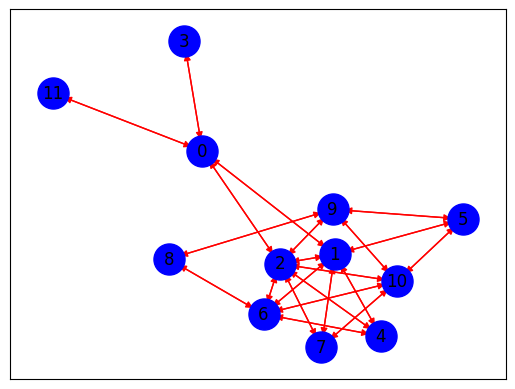

In [35]:
G = nx.DiGraph()
for i in range(len(cossim)):
    G.add_node(i)

for i in range(len(cossim)):
    for j in range(len(cossim)):
        similarity = cossim[i][j]
        if similarity > 0.1 and i != j:
            G.add_edge(i, j)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='red', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

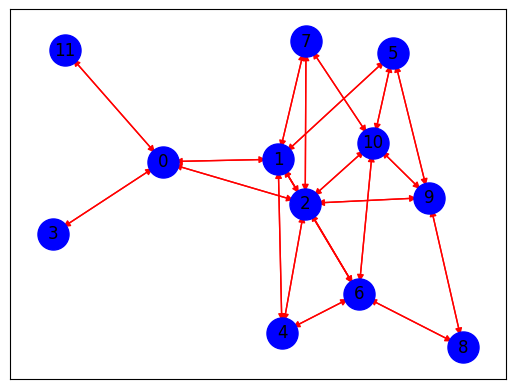

In [36]:
G_preprocessing = nx.DiGraph()
for i in range(len(cossim_prep)):
    G_preprocessing.add_node(i)

for i in range(len(cossim_prep)):
    for j in range(len(cossim_prep)):
        similarity_preprocessing = cossim_prep[i][j]
        if similarity_preprocessing > 0.1 and i != j:
            G_preprocessing.add_edge(i, j)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='red', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

## Matrix Centralitas


# Closeness Centrality

## Apa itu Closeness Centrality?
*Closeness centrality* adalah salah satu ukuran penting dalam analisis jaringan (*network analysis*), yang digunakan untuk mengukur seberapa "dekat" suatu simpul (*node*) dengan simpul-simpul lainnya dalam sebuah graf (jaringan). Semakin tinggi nilai closeness centrality suatu simpul, semakin efisien simpul tersebut dalam mencapai simpul-simpul lain dalam jaringan.

Secara intuitif, closeness centrality menunjukkan kemampuan sebuah simpul untuk secara cepat mencapai simpul lain dalam jaringan, sehingga simpul dengan closeness centrality tinggi cenderung menjadi titik penting dalam penyebaran informasi atau penghubung antara berbagai bagian dari jaringan.

## Cara Kerja Closeness Centrality
Closeness centrality dihitung berdasarkan total jarak terpendek (*shortest path*) dari satu simpul ke semua simpul lainnya dalam jaringan. Semakin kecil jumlah jarak totalnya, semakin besar nilai closeness centrality simpul tersebut.

Untuk sebuah simpul `v`, closeness centrality didefinisikan sebagai:

\[
C(v) = \frac{N-1}{\sum_{u \neq v} d(v,u)}
\]

Dimana:
- `N` adalah jumlah total simpul dalam graf,
- `d(v, u)` adalah jarak terpendek antara simpul `v` dan `u`.

Dengan rumus ini, closeness centrality menekankan pentingnya simpul yang memiliki akses cepat ke simpul lainnya dalam jaringan.

### Jarak Terpendek (*Shortest Path*)
Dalam konteks graf, jarak terpendek antara dua simpul adalah jumlah langkah atau bobot terendah yang harus ditempuh untuk mencapai simpul tersebut dari simpul awal. Dalam graf tak berbobot, jarak terpendek adalah jumlah simpul (atau *edges*) yang harus dilalui.

## Contoh:
Misalkan kita memiliki graf sederhana berikut:




Untuk menghitung closeness centrality dari simpul-simpul tersebut:
1. **Simpul A**:
   - Jarak ke B = 1,
   - Jarak ke C = 1,
   - Jarak ke D = 2,
   - Jarak ke E = 2.
   
   Total jarak dari A ke simpul lainnya = 1 + 1 + 2 + 2 = 6.
   Closeness centrality dari A = \(\frac{5}{6}\).

2. **Simpul C**:
   - Jarak ke A = 1,
   - Jarak ke B = 1,
   - Jarak ke D = 1,
   - Jarak ke E = 1.
   
   Total jarak dari C ke simpul lainnya = 1 + 1 + 1 + 1 = 4.
   Closeness centrality dari C = \(\frac{5}{4}\).

Simpul **C** memiliki nilai closeness centrality tertinggi, menunjukkan bahwa simpul ini adalah simpul paling sentral dalam jaringan, karena memiliki jarak yang paling dekat ke semua simpul lainnya.

## Aplikasi Closeness Centrality

Closeness centrality memiliki berbagai aplikasi dalam dunia nyata, terutama dalam konteks jaringan sosial, jaringan komputer, hingga jaringan distribusi logistik:

1. **Penyebaran Informasi**: Dalam jaringan sosial, simpul dengan closeness centrality tinggi lebih efisien dalam menyebarkan informasi karena bisa menjangkau simpul lain dengan lebih sedikit langkah.
   
2. **Optimasi Jaringan Komunikasi**: Dalam jaringan komputer atau komunikasi, simpul dengan closeness centrality tinggi cenderung menjadi titik penting untuk routing data, karena aksesibilitasnya ke simpul lainnya.

3. **Rantai Pasokan dan Logistik**: Dalam jaringan distribusi, simpul dengan closeness centrality tinggi dapat menjadi pusat distribusi optimal, karena dapat menghubungkan berbagai simpul lain secara lebih efisien.

## Keterbatasan Closeness Centrality

1. **Graf Tidak Terhubung**: Jika jaringan tidak terhubung (ada simpul yang tidak bisa dicapai dari simpul lain), closeness centrality tidak dapat dihitung secara benar karena beberapa simpul mungkin memiliki jarak tak terhingga ke simpul lainnya.

2. **Graf Skala Besar**: Pada jaringan yang sangat besar, menghitung closeness centrality untuk setiap simpul bisa menjadi tugas yang mahal secara komputasi, karena membutuhkan perhitungan jarak terpendek untuk setiap pasangan simpul.

3. **Bobot Jaringan**: Pada graf berbobot, jarak terpendek juga memperhitungkan bobot (*weight*) pada setiap edge, sehingga menambah kompleksitas perhitungan closeness centrality.

## Kesimpulan
Closeness centrality adalah ukuran yang sangat berguna untuk menentukan simpul-simpul yang memiliki aksesibilitas tinggi dalam jaringan. Simpul dengan nilai closeness centrality yang tinggi cenderung dapat menjangkau simpul-simpul lain dengan lebih cepat dan efisien, membuatnya penting dalam berbagai aplikasi seperti penyebaran informasi, optimasi komunikasi, dan distribusi logistik.


#### Closeness Centrality tanpa Preprocessing


In [37]:
closeness= nx.closeness_centrality(G)

sorted_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)
print("Closeness Centrality:")
for node, closeness in sorted_closeness:
    print(f"Node {node}: {closeness:.4f}")

Closeness Centrality:
Node 2: 0.7333
Node 1: 0.6875
Node 0: 0.5789
Node 6: 0.5789
Node 10: 0.5789
Node 9: 0.5500
Node 4: 0.5238
Node 5: 0.5238
Node 7: 0.5000
Node 8: 0.4231
Node 3: 0.3793
Node 11: 0.3793


In [38]:
# print(sorted_closeness_preprocessing)
# print(top_sentence)

#### Ringkasan Berita


In [39]:
ringkasan_closeness = ""
print("Tiga Node Tertinggi Closeness Centrality:")
for node, closeness in sorted_closeness[:3]:
    top_sentence = kalimat[node]
    ringkasan_closeness += top_sentence + " "
    print(f"Node {node}: Closeness Centrality = {closeness:.4f}")
    print(f"Kalimat: {top_sentence}\n")

Tiga Node Tertinggi Closeness Centrality:
Node 2: Closeness Centrality = 0.7333
Kalimat: "Pilkada seharusnya menjadi sarana pendidikan politik yang baik bagi masyarakat, bukan menjadi ajang untuk membuat gerakan-gerakan yang tidak produktif," kata Anthony di Jakarta, Rabu.

Node 1: Closeness Centrality = 0.6875
Kalimat: Anthony khawatir munculnya gerakan tersebut justru membodohi masyarakat karena hal itu tidak produktif.

Node 0: Closeness Centrality = 0.5789
Kalimat: 
Jakarta (ANTARA) - Koordinator Nasional Prabowo-Gibran Digital Team (Pride) Anthony Leong mengatakan bahwa munculnya ajakan gerakan untuk mencoblos tiga pasangan calon (paslon) atau "tusuk 3 paslon" menjelang Pilkada Jakarta 2024 berpotensi merusak proses demokrasi.



#### Closeness Centrality menggunakan Preprocessing


In [40]:
closeness_preprocessing = nx.closeness_centrality(G_preprocessing)

sorted_closeness_preprocessing = sorted(closeness_preprocessing.items(), key=lambda x: x[1], reverse=True)
print("Closeness Centrality:")
for node, closeness in sorted_closeness_preprocessing:
    print(f"Node {node}: {closeness:.4f}")

Closeness Centrality:
Node 2: 0.7333
Node 1: 0.6875
Node 0: 0.5789
Node 6: 0.5789
Node 10: 0.5789
Node 9: 0.5500
Node 4: 0.5238
Node 5: 0.5238
Node 7: 0.5000
Node 8: 0.4231
Node 3: 0.3793
Node 11: 0.3793


In [41]:
# print(sorted_closeness_preprocessing)
# print(top_sentence)

#### Ringkasan Berita


In [42]:
ringkasan_closeness_preprocessing = ""
print("Tiga Node Tertinggi Closeness Centrality Menggunakan Preprocessing:")
for node, closeness_preprocessing in sorted_closeness_preprocessing[:3]:
    top_sentence = kalimat[node]
    ringkasan_closeness_preprocessing += top_sentence + " "
    print(f"Node {node}: Closeness Centrality = {closeness_preprocessing:.4f}")
    print(f"Kalimat: {top_sentence}\n")

Tiga Node Tertinggi Closeness Centrality Menggunakan Preprocessing:
Node 2: Closeness Centrality = 0.7333
Kalimat: "Pilkada seharusnya menjadi sarana pendidikan politik yang baik bagi masyarakat, bukan menjadi ajang untuk membuat gerakan-gerakan yang tidak produktif," kata Anthony di Jakarta, Rabu.

Node 1: Closeness Centrality = 0.6875
Kalimat: Anthony khawatir munculnya gerakan tersebut justru membodohi masyarakat karena hal itu tidak produktif.

Node 0: Closeness Centrality = 0.5789
Kalimat: 
Jakarta (ANTARA) - Koordinator Nasional Prabowo-Gibran Digital Team (Pride) Anthony Leong mengatakan bahwa munculnya ajakan gerakan untuk mencoblos tiga pasangan calon (paslon) atau "tusuk 3 paslon" menjelang Pilkada Jakarta 2024 berpotensi merusak proses demokrasi.



### Page Rank


In [43]:
pagerank = nx.pagerank(G)

sorted_pagerank= sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
print("Page Rank :")
for node, pagerank in sorted_pagerank:
    print(f"Node {node}: {pagerank:.4f}")

Page Rank :
Node 2: 0.1456
Node 1: 0.1278
Node 0: 0.1089
Node 6: 0.1057
Node 10: 0.1045
Node 9: 0.0878
Node 5: 0.0670
Node 4: 0.0663
Node 7: 0.0660
Node 8: 0.0491
Node 3: 0.0356
Node 11: 0.0356


In [44]:
ringkasan_pagerank = ""
print("Tiga Node Tertinggi Page Rank :")
for node, pagerank in sorted_pagerank[:3]:
    top_sentence = kalimat[node]
    ringkasan_pagerank += top_sentence + " "
    print(f"Node {node}: Page Rank = {pagerank:.4f}")
    print(f"Kalimat: {top_sentence}\n")

Tiga Node Tertinggi Page Rank :
Node 2: Page Rank = 0.1456
Kalimat: "Pilkada seharusnya menjadi sarana pendidikan politik yang baik bagi masyarakat, bukan menjadi ajang untuk membuat gerakan-gerakan yang tidak produktif," kata Anthony di Jakarta, Rabu.

Node 1: Page Rank = 0.1278
Kalimat: Anthony khawatir munculnya gerakan tersebut justru membodohi masyarakat karena hal itu tidak produktif.

Node 0: Page Rank = 0.1089
Kalimat: 
Jakarta (ANTARA) - Koordinator Nasional Prabowo-Gibran Digital Team (Pride) Anthony Leong mengatakan bahwa munculnya ajakan gerakan untuk mencoblos tiga pasangan calon (paslon) atau "tusuk 3 paslon" menjelang Pilkada Jakarta 2024 berpotensi merusak proses demokrasi.



In [45]:
pagerank_preprocessing = nx.pagerank(G_preprocessing)

sorted_pagerank_preprocessing= sorted(pagerank_preprocessing.items(), key=lambda x: x[1], reverse=True)
print("Page Rank :")
for node, pagerank_preprocessing in sorted_pagerank_preprocessing:
    print(f"Node {node}: {pagerank_preprocessing:.4f}")

Page Rank :
Node 2: 0.1456
Node 1: 0.1278
Node 0: 0.1089
Node 6: 0.1057
Node 10: 0.1045
Node 9: 0.0878
Node 5: 0.0670
Node 4: 0.0663
Node 7: 0.0660
Node 8: 0.0491
Node 3: 0.0356
Node 11: 0.0356


In [46]:
ringkasan_pagerank_preprocessing = ""
print("Tiga Node Tertinggi Page Rank Menggunakan Preprocessing:")
for node, pagerank_preprocessing in sorted_pagerank_preprocessing[:3]:
    top_sentence = kalimat[node]
    ringkasan_pagerank_preprocessing += top_sentence + " "
    print(f"Node {node}: Page Rank = {pagerank_preprocessing:.4f}")
    print(f"Kalimat: {top_sentence}\n")

Tiga Node Tertinggi Page Rank Menggunakan Preprocessing:
Node 2: Page Rank = 0.1456
Kalimat: "Pilkada seharusnya menjadi sarana pendidikan politik yang baik bagi masyarakat, bukan menjadi ajang untuk membuat gerakan-gerakan yang tidak produktif," kata Anthony di Jakarta, Rabu.

Node 1: Page Rank = 0.1278
Kalimat: Anthony khawatir munculnya gerakan tersebut justru membodohi masyarakat karena hal itu tidak produktif.

Node 0: Page Rank = 0.1089
Kalimat: 
Jakarta (ANTARA) - Koordinator Nasional Prabowo-Gibran Digital Team (Pride) Anthony Leong mengatakan bahwa munculnya ajakan gerakan untuk mencoblos tiga pasangan calon (paslon) atau "tusuk 3 paslon" menjelang Pilkada Jakarta 2024 berpotensi merusak proses demokrasi.

